In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
%matplotlib inline


In [39]:
df = pd.read_csv("dataframe.csv")
df.head()

,Unnamed: 0,sub,Age,Gender,Study,count,session,Condition,task,Headset,unique_id,filename
0,0,9003,41,F,INSPECDS,286,900301000,HC,RSEC,X24,9003_RSEC,INSPEC.INIT.900301000.010217.104300.Signals.Ra...
1,1,9003,41,F,INSPECDS,296,900301000,HC,RSEO,X24,9003_RSEO,INSPEC.INIT.900301000.010217.104300.Signals.Ra...
2,2,9004,66,F,INSPECDS,266,900401000,HC,RSEC,X24,9004_RSEC,INSPEC.INIT.900401000.070217.105622.Signals.Ra...
3,3,9004,66,F,INSPECDS,285,900401000,HC,RSEO,X24,9004_RSEO,INSPEC.INIT.900401000.070217.105622.Signals.Ra...
4,4,9006,52,M,INSPECDS,288,900601000,HC,RSEC,X24,9006_RSEC,INSPEC.INIT.900601000.130217.115256.Signals.Ra...


In [40]:
raw_fname = df.head(3)["filename"].values[0]

raw_fname

'INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf'

In [41]:
raw = mne.io.read_raw_edf( 'Data/' + raw_fname, preload=True)
raw

Extracting EDF parameters from c:\Users\jimmy\Documents\CNU\EEG\Data\INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307199  =      0.000 ...   299.999 secs...


<RawEDF | INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf, 30 x 307200 (300.0 s), ~70.3 MB, data loaded>

In [42]:
channels = raw.ch_names[:20]

raw.get_data(channels).shape
raw.pick_channels(channels)

<RawEDF | INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf, 20 x 307200 (300.0 s), ~46.9 MB, data loaded>

In [9]:
easycap_montage = mne.channels.make_standard_montage('standard_1020')
print(easycap_montage)
raw.set_montage(easycap_montage)
raw

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


<RawEDF | INSPEC.INIT.900401000.070217.105622.Signals.Raw_RSEC_01.edited.25.108.325.112.edf, 20 x 308224 (301.0 s), ~47.1 MB, data loaded>

In [10]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
raw.pick(picks);

In [11]:
raw.resample(512.);

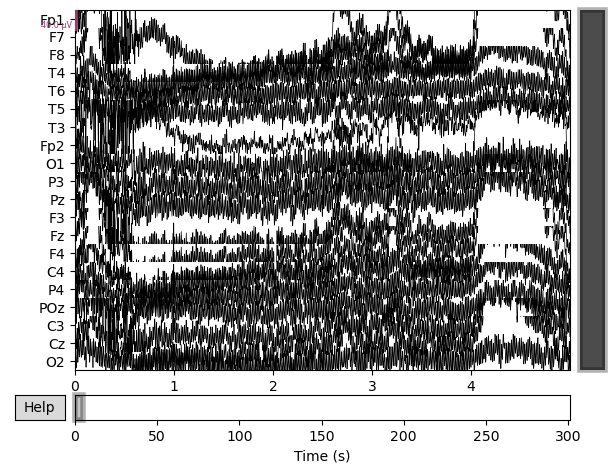

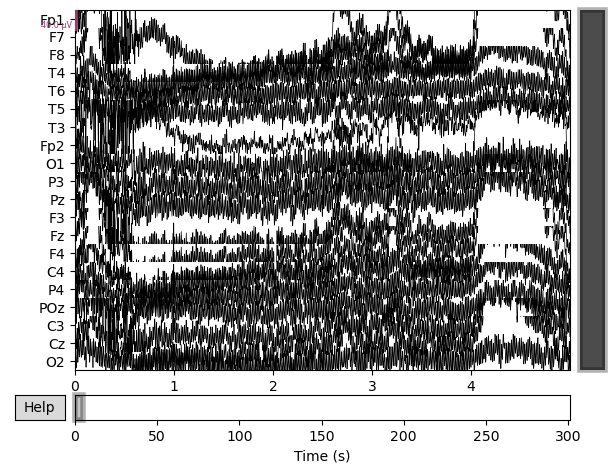

In [12]:
raw.plot(duration=5, n_channels=20)


In [13]:
raw.filter(l_freq=1., h_freq=100.);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (3.303 sec)



Effective window size : 4.000 (s)


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\evoked.py:551: MatplotlibDeprecationWarning: The 'rectprops' parameter of __init__() has been renamed 'props' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax._span_selector = SpanSelector(


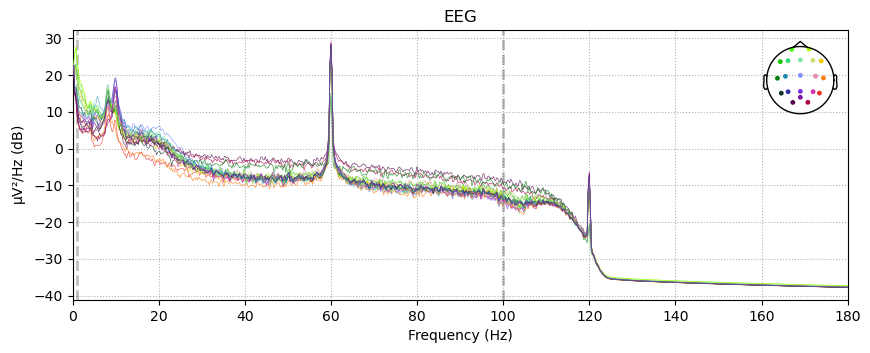

In [14]:
raw.plot_psd(fmax=180);


In [15]:
raw_uncleaned = raw.copy()

In [16]:
asr = mne.preprocessing.ASR(sfreq=raw.info["sfreq"], cutoff=5)


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\preprocessing\asr_utils.py:266: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.exp(np.fft.fft(Rwindow * np.fft.ifft(np.log(Ss, dtype=np.complex))))  # noqa


In [17]:
asr.fit(raw._data)


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\preprocessing\asr.py:691: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask1 = swz[-(np.int(max_bad_chans) + 1), :] > np.max(zthresholds)
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\preprocessing\asr.py:693: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

In [18]:
raw._data = asr.transform(raw._data)


Uncleaned data


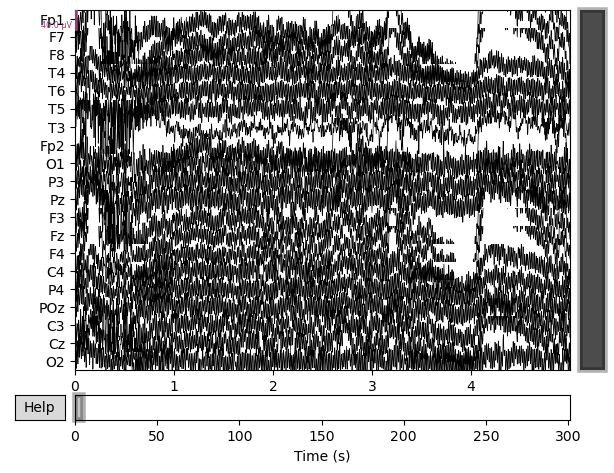

Cleaned data


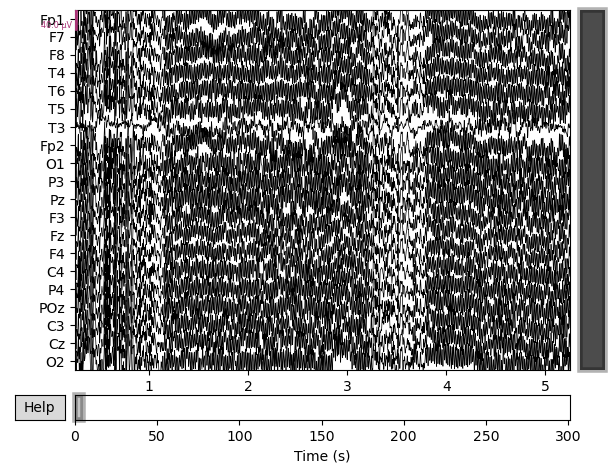

In [19]:


print("Uncleaned data")
raw_uncleaned.plot(duration=5);

print("Cleaned data")
raw.plot(start=0.25, duration=5);

In [20]:
ica = mne.preprocessing.ICA(n_components=20, random_state=24052021)
ica.fit(raw)

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 20 components


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\utils\check.py:90: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\utils\check.py:90: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\jimmy\AppData\Local\Temp\ipykernel_2868\699376072.py:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=24052021)


Fitting ICA took 2.6s.


<ICA | raw data decomposition, fit (fastica): 154112 samples, 20 components, channels used: "eeg">

c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
c:\Users\jimmy\Anaconda3\lib\site-packages\m

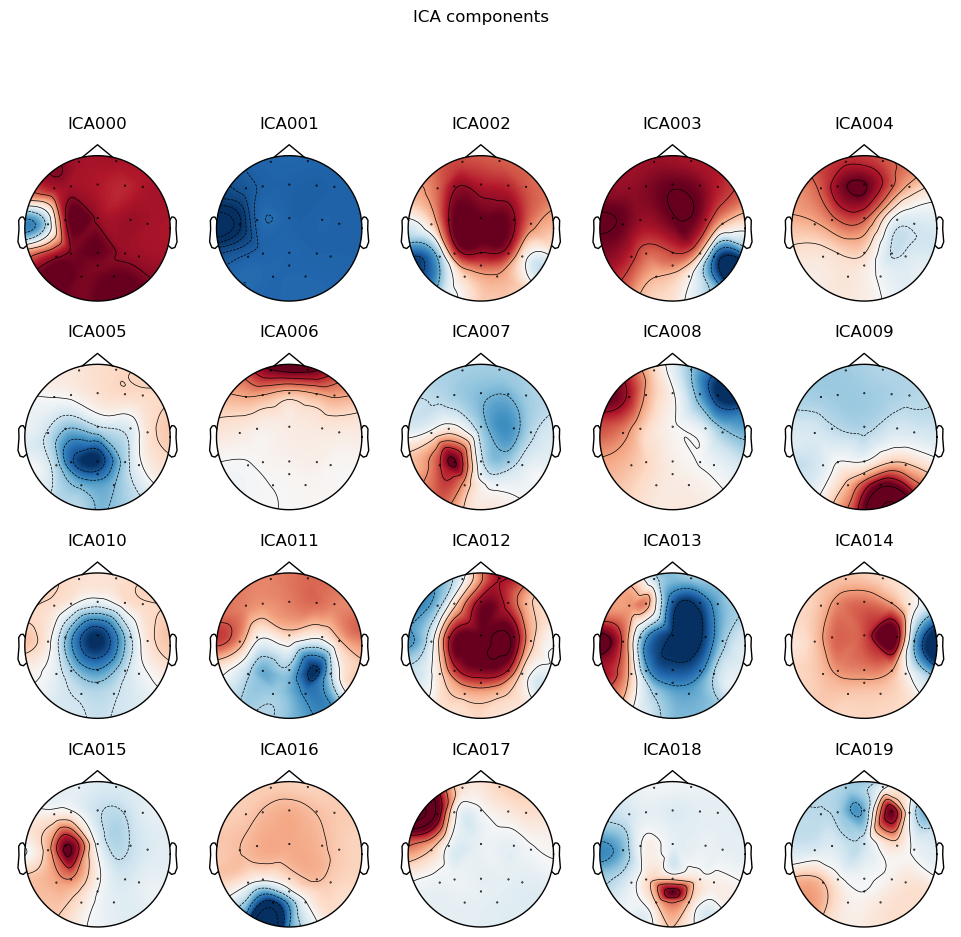

In [21]:
ica.plot_components(picks=np.arange(20));


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


Not setting metadata
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\topomap.py:469: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


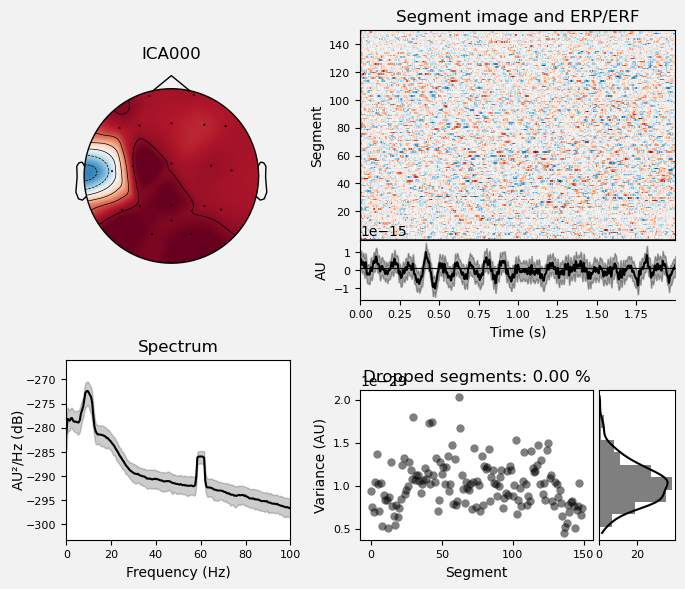

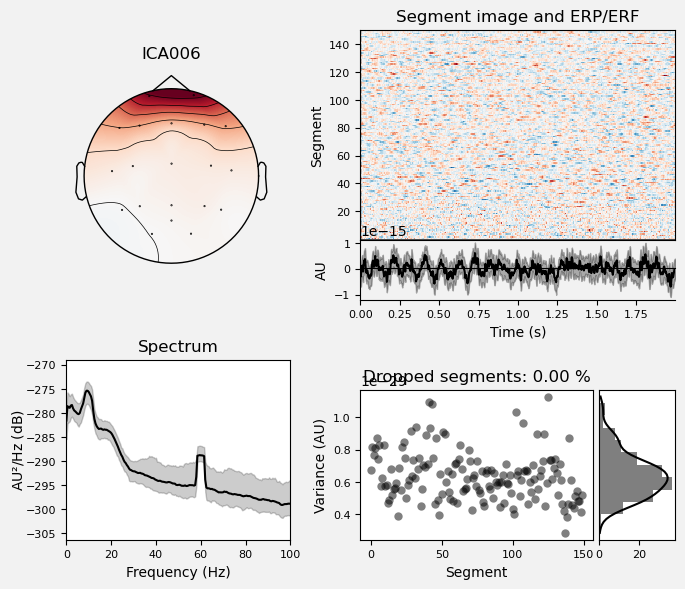

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [33]:
ica.plot_properties(raw, picks=[0, 6], psd_args={"fmax":100.})


In [34]:
ica.exclude.extend([0 ])


In [35]:
raw = ica.apply(raw)


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 20 PCA components


Uncleaned data


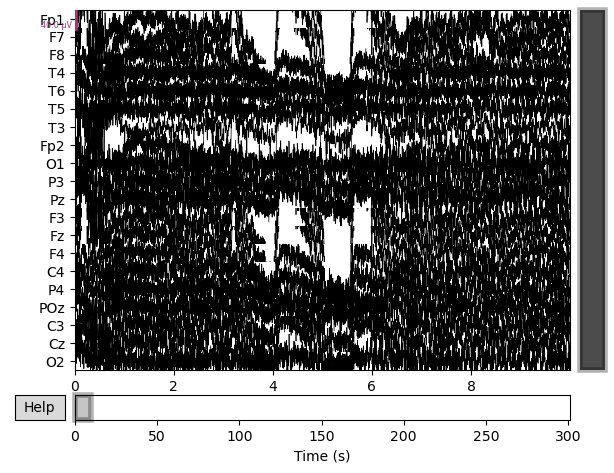

Cleaned data


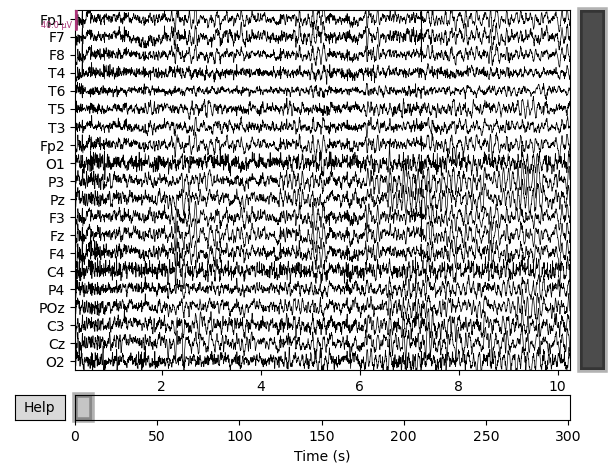

In [36]:
scalings= {"eeg":2e-5}

print("Uncleaned data")
raw_uncleaned.plot(scalings=scalings);

print("Cleaned data")
raw.plot(start=0.25, scalings=scalings);

Effective window size : 4.000 (s)


c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\evoked.py:551: MatplotlibDeprecationWarning: The 'rectprops' parameter of __init__() has been renamed 'props' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax._span_selector = SpanSelector(


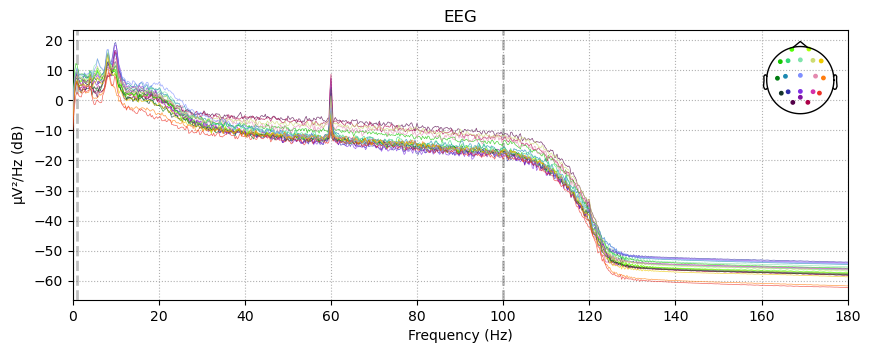

In [37]:
raw.plot_psd(fmax=180);
